# Time Series Analysis on JPM Stock Price

In [ ]:
# Import packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns 
sns.set_style("dark")

from statsmodels.api import tsa # time series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load JPM Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load bank dataset
df_bank = pd.read_csv('/content/drive/MyDrive/TimeSeries/megabank_stock.csv', index_col=0)

In [ ]:
# convert to datetime index
df_bank.index = pd.to_datetime(df_bank.index)
df_bank.head()

,Adj Close BAC,Adj Close GS,Adj Close HSBC,Adj Close JPM,Adj Close MS,Adj Close RY,Adj Close TD,Adj Close WFC,Close BAC,Close GS,...,Open TD,Open WFC,Volume BAC,Volume GS,Volume HSBC,Volume JPM,Volume MS,Volume RY,Volume TD,Volume WFC
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,21.949945,52.764973,20.656130,14.395320,23.272638,8.531053,5.087502,13.742735,35.340000,69.650002,...,10.875,23.575001,12584000,4025400,1081700,16739100,4310700,75400,86200,9904200
2003-01-03,21.813301,53.317997,20.902828,14.678248,23.228249,8.627298,5.147490,13.550333,35.119999,70.379997,...,11.075,24.025000,7803400,2342800,1114900,12525700,2963100,101400,120800,7808000
2003-01-06,22.126961,55.302856,21.109016,15.832584,23.855307,8.746449,5.242086,13.819124,35.625000,73.000000,...,11.155,23.900000,12500600,4337600,2100600,22932400,4167300,312000,71800,8097400
2003-01-07,22.161121,55.075584,20.766588,15.753373,23.982925,8.734997,5.216707,13.734243,35.680000,72.699997,...,11.360,24.424999,9804800,4606900,1609100,17837500,5213800,234200,85800,6556200
2003-01-08,22.071058,53.727081,20.692965,15.147902,23.386003,8.485226,5.156716,13.539013,35.535000,70.919998,...,11.295,24.275000,8487600,3265200,889000,15857300,4054600,178000,77000,8071000


In [ ]:
# select columns relevant to JPM
df_jpm = df_bank[['Adj Close JPM']]
df_jpm.rename(columns={"Adj Close JPM": "jpm_price"}, inplace=True)
# check df infomation
df_jpm.info()
# look at df
display(df_jpm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5097 entries, 2003-01-02 to 2023-03-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   jpm_price  5097 non-null   float64
dtypes: float64(1)
memory usage: 79.6 KB


<ipython-input-6-8fb7545deb72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jpm.rename(columns={"Adj Close JPM": "jpm_price"}, inplace=True)


,jpm_price
Date,
2003-01-02,14.395320
2003-01-03,14.678248
2003-01-06,15.832584
2003-01-07,15.753373
2003-01-08,15.147902
...,...
2023-03-27,127.489464
2023-03-28,127.876427
2023-03-29,128.134399


# Explore JPM price change over time

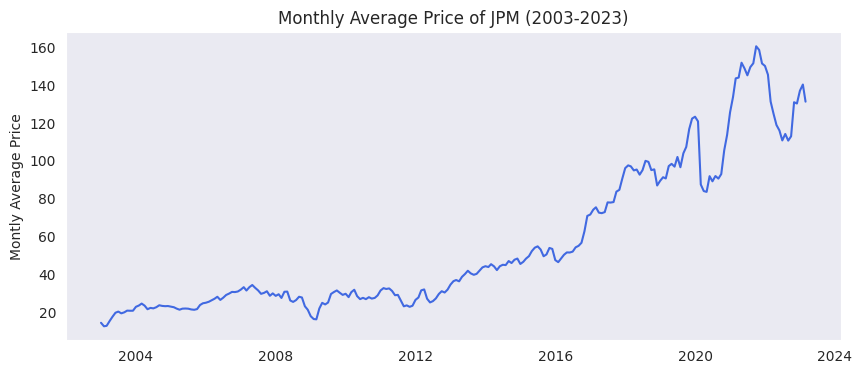

In [ ]:
# the "MS" option specifies Monthly frequency by Start day
jpm_mp = df_jpm.resample("MS").mean()

# plot monthly average price of JPM
plt.figure(figsize = (10, 4))
sns.lineplot(x=jpm_mp.index, y=jpm_mp['jpm_price'], color = 'royalblue')
plt.title('Monthly Average Price of JPM (2003-2023)')
plt.ylabel('Montly Average Price')
plt.xlabel(None)
plt.show()

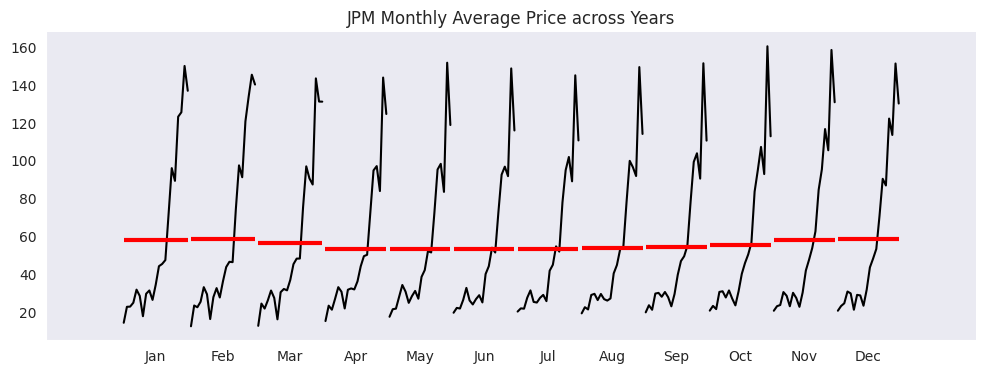

In [ ]:
# further looking at monthly average across years

from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(12, 4))

# create the seasonal plot
month_plot(jpm_mp["jpm_price"], ax=plt.gca())

plt.title("JPM Monthly Average Price across Years")
sns.despine()
plt.show()

It shows there is no seasonal patterns from month plot

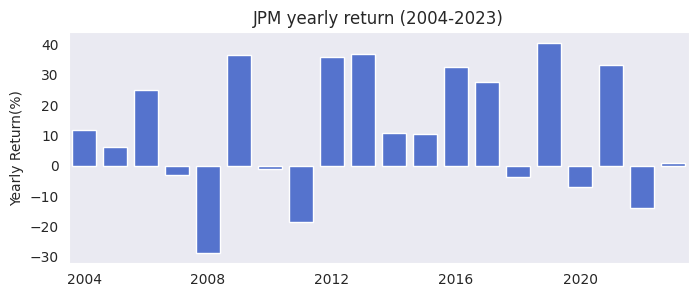

In [ ]:
# yearly return
# jpm_yearly_return = pd.DataFrame(jpm_df['Daily_Return_JPM'].resample("BA").tail(1))
# jpm_yearly_return.index = pd.to_datetime(jpm_yearly_return.index)

# calculate yearly return in percentage format and dropping the first null value
jpm_yr = pd.DataFrame(jpm_mp.groupby(jpm_mp.index.year)['jpm_price'].tail(1).pct_change()*100).dropna()

# plot JPM yearly return
plt.figure(figsize=(8, 3))
sns.barplot(x=jpm_yr.index, y=jpm_yr['jpm_price'], color = 'royalblue')
plt.xticks(range(0, len(jpm_yr.index), 4), jpm_yr.index.year[::4])
plt.ylabel('Yearly Return(%)')
plt.xlabel(None)
plt.title('JPM yearly return (2004-2023)')
plt.show()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Differencing

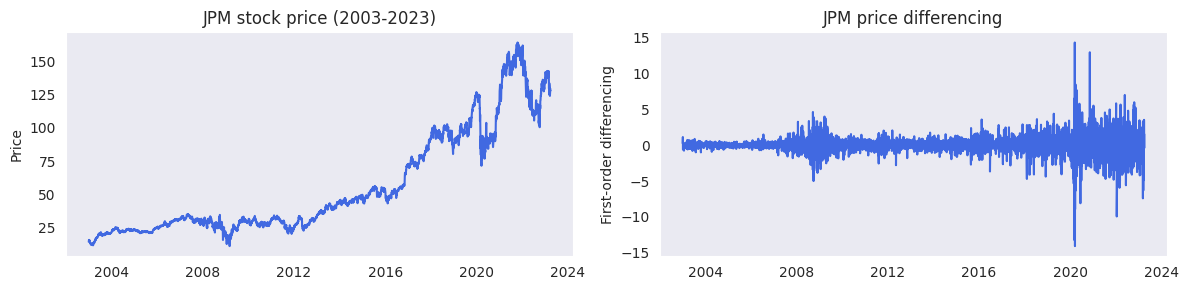

In [ ]:
# plot the original price trend and the first order differencing

plt.subplots(1, 2, figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.lineplot(x=df_jpm.index, y = df_jpm['jpm_price'], color='royalblue')
plt.title('JPM stock price (2003-2023)')
plt.xlabel(None)
plt.ylabel('Price')

plt.subplot(1, 2, 2)
jpm_diff = df_jpm.diff().dropna()
sns.lineplot(x=jpm_diff.index, y = jpm_diff['jpm_price'], color='royalblue')
plt.title('JPM price differencing')
plt.xlabel(None)
plt.ylabel('First-order differencing')

plt.tight_layout()
plt.show()


Since the variance of the data is increasing, will apply log transformation first and then follow by differencing

Text(0, 0.5, 'Differenced log price')

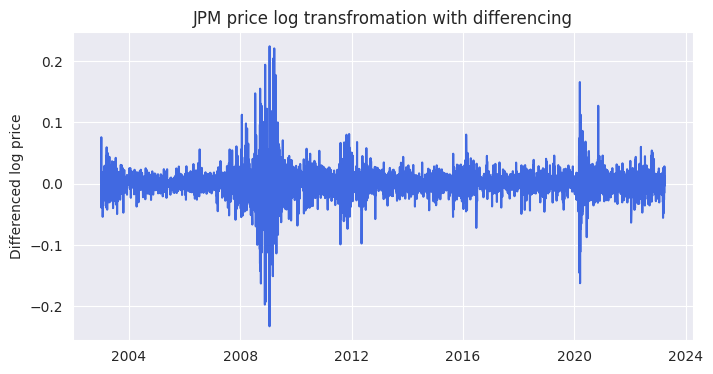

In [ ]:
# log transfrom price and apply differencing
jpm_logdiff = df_jpm.transform(np.log).diff().dropna()

# plot the log transfromed differencing 
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.lineplot(x=jpm_logdiff.index, y = jpm_logdiff['jpm_price'], color='royalblue')
plt.title('JPM price log transfromation with differencing')
plt.xlabel(None)
plt.ylabel('Differenced log price')

After log transformation, it shows there's higher variance during 2008 and 2020, which also indicates the significant impact from 2008 financial crisis and COVID. Overall, the variance tends to be stable within range of -0.1 to 0.1.

Further look at ACF and PACF for the original and differenced data

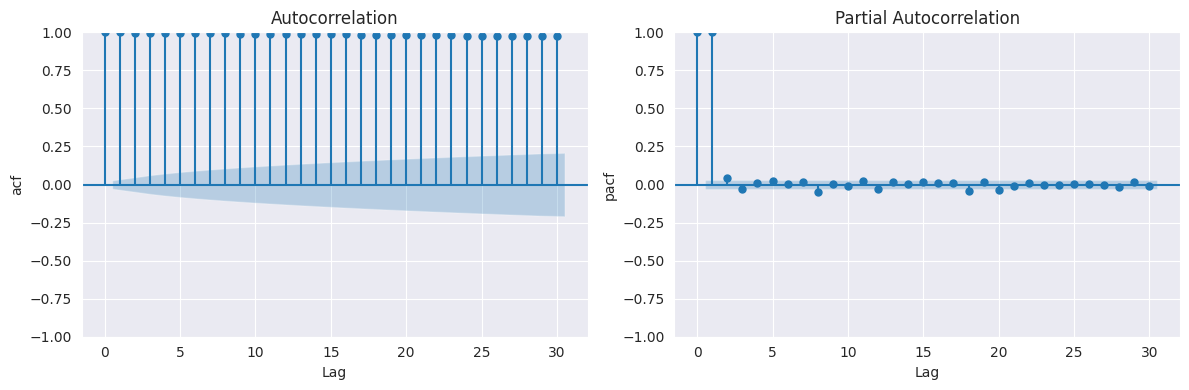

In [ ]:
# plot autocorrelation on the price value

plt.subplots(1,2, figsize=(12,4))

# put the acf plot on the left
plt.subplot(1,2,1)
plot_acf(df_jpm["jpm_price"], lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('acf')

# put the acf plot on the right
plt.subplot(1,2,2)
plot_pacf(df_jpm["jpm_price"], lags=30, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('pacf')

plt.tight_layout()
plt.show()

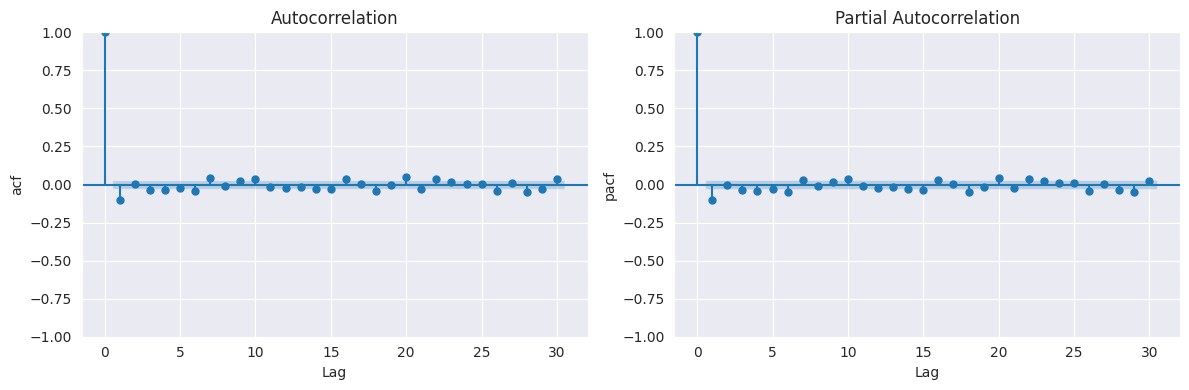

In [ ]:
# plot autocorrelation on the differenced data

plt.subplots(1,2, figsize=(12,4))

# put the acf plot on the left
plt.subplot(1,2,1)
plot_acf(jpm_logdiff["jpm_price"], lags=30, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('acf')

# put the acf plot on the right
plt.subplot(1,2,2)
plot_pacf(jpm_logdiff["jpm_price"], lags=30, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('pacf')

plt.tight_layout()
plt.show()

After log transformation and first-order differencing, it shows the data is staionary with significant drop after lag of 1 for both ACF and PACF.

# Forecasting JPM Stock Price


In [ ]:
# set frequency as business day and filling null values as backforward
df_jpm = df_jpm.asfreq(freq='B', method='bfill')
df_jpm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2003-01-02 to 2023-03-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   jpm_price  5282 non-null   float64
dtypes: float64(1)
memory usage: 82.5 KB


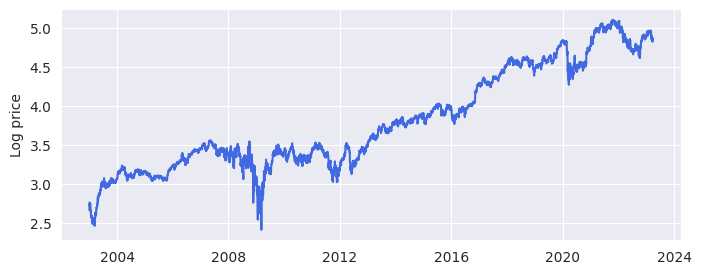

In [ ]:
# log price transformation
jpm_log = df_jpm.transform(np.log)

# plot log price
plt.figure(figsize=(8,3))
sns.lineplot(x=jpm_log.index, y=jpm_log['jpm_price'], color = 'royalblue')
plt.ylabel('Log price')
plt.xlabel(None)
plt.show()

In [ ]:
# split into train and test set
train = df_jpm.loc[df_jpm.index < "2021-01-01", "jpm_price"]
test = df_jpm.loc[(df_jpm.index >= "2021-01-01"), "jpm_price"]

# split log values into train and test as well
train_log = jpm_log.loc[jpm_log.index < "2021-01-01", "jpm_price"]
test_log = jpm_log.loc[(jpm_log.index >= "2021-01-01"), "jpm_price"]

print(train.shape, test.shape, train_log.shape, test_log.shape)

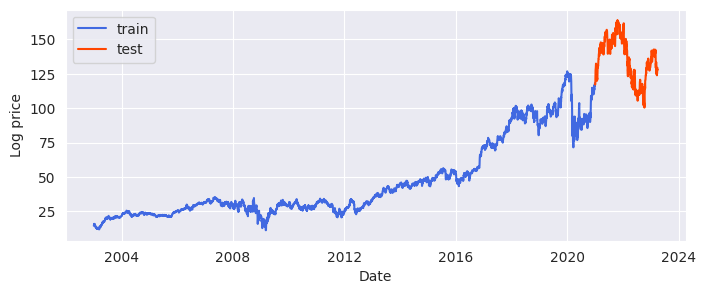

In [ ]:
# plot the train and test

plt.figure(figsize=(8,3))
sns.lineplot(x=train.index, y=train, color='royalblue', label='train')
sns.lineplot(x=test.index, y=test, color='orangered', label='test')
plt.ylabel('Log price')
plt.show()


### Baseline forecast and evaluation

In [ ]:
# full index
full_index = pd.concat([train, test]).index
print(full_index.shape)

# calculate baseline of train average
base_line = np.full(full_index.shape, np.mean(train))
# make predictions as average line
base_predictions = pd.Series(data=base_line, index=full_index)

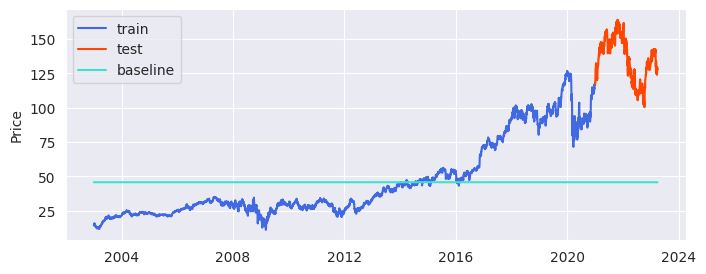

In [ ]:
# plot train, test, and baseline

plt.figure(figsize=(8, 3))
sns.lineplot(x=train.index, y=train, color='royalblue', label='train')
sns.lineplot(x=test.index, y=test, color='orangered', label='test')
sns.lineplot(x=full_index, y=base_predictions, color = 'turquoise', label = 'baseline')
plt.ylabel('Price')
plt.xlabel(None)
plt.show()


In [ ]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

In [ ]:
train_mape = mean_absolute_percentage_error(train, base_predictions[train.index])
test_mape = mean_absolute_percentage_error(test, base_predictions[test.index])

print(f"Train MAPE: {round(train_mape, 2)}%")
print(f"Test MAPE: {round(test_mape, 2)}%")

Train MAPE: 59.51%
Test MAPE: 65.85%


## Random Walk with Drift

Based on previous differencing chat, we understand a first order differencing is needed while there's a drift upwards in the trend. So will first use random walk with drift as forecasting.

In [ ]:
#fitting RW model
RW_model = SARIMAX(train_log, order=(0, 1, 0), trend = 'c')
RW_model_fit = RW_model.fit(disp=0)

RW_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              jpm_price   No. Observations:                 4696
Model:               SARIMAX(0, 1, 0)   Log Likelihood               11039.917
Date:                Tue, 02 May 2023   AIC                         -22075.833
Time:                        21:41:46   BIC                         -22062.925
Sample:                    01-02-2003   HQIC                        -22071.294
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.332      0.183      -0.000       0.001
sigma2         0.0005   3.45e-06    153.941      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  33.03   Jarque-Bera (JB):             65325.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# obtain predictions
RW_predictions = RW_model_fit.get_prediction(start=1, end=len(train)+len(test)-1)
RW_predictions

In [ ]:
# create predictions dataframe
RW_pred_df = RW_predictions.conf_int(alpha=0.05)
RW_pred_df['mean'] = RW_predictions.predicted_mean
RW_pred_df['lower 20'] = RW_predictions.conf_int(alpha=0.2).iloc[:,0]
RW_pred_df['upper 20'] = RW_predictions.conf_int(alpha=0.2).iloc[:,1]

RW_pred_df.info()

RW_pred_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5281 entries, 2003-01-03 to 2023-03-31
Freq: B
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lower jpm_price  5281 non-null   float64
 1   upper jpm_price  5281 non-null   float64
 2   mean             5281 non-null   float64
 3   lower 20         5281 non-null   float64
 4   upper 20         5281 non-null   float64
dtypes: float64(5)
memory usage: 376.6 KB


,lower jpm_price,upper jpm_price,mean,lower 20,upper 20
2003-01-03,2.622187,2.712517,2.667352,2.637820,2.696884
2003-01-06,2.641650,2.731980,2.686815,2.657284,2.716347
2003-01-07,2.717354,2.807684,2.762519,2.732987,2.792051
2003-01-08,2.712338,2.802668,2.757503,2.727971,2.787035
2003-01-09,2.673146,2.763476,2.718311,2.688779,2.747843
...,...,...,...,...,...
2023-03-27,3.945252,6.124435,5.034844,4.322398,5.747289
2023-03-28,3.944765,6.125820,5.035293,4.322235,5.748350
2023-03-29,3.944279,6.127203,5.035741,4.322073,5.749410
2023-03-30,3.943794,6.128586,5.036190,4.321911,5.750469


In [ ]:
# convert price back to exponential data
RW_pred_mean = RW_pred_df['mean'].transform(np.exp)
RW_pred_mean

2003-01-03     14.401781
2003-01-06     14.684836
2003-01-07     15.839691
2003-01-08     15.760444
2003-01-09     15.154700
                 ...    
2023-03-27    153.675598
2023-03-28    153.744572
2023-03-29    153.813577
2023-03-30    153.882613
2023-03-31    153.951680
Freq: B, Name: mean, Length: 5281, dtype: float64

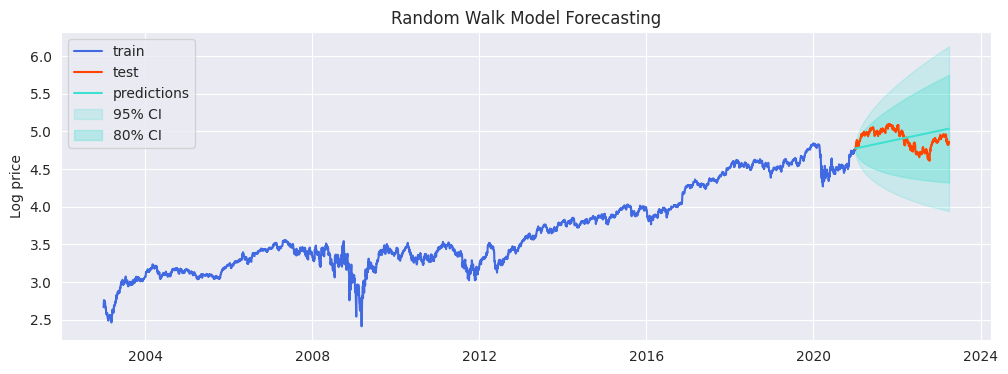

In [ ]:
# plot RW precdictions in log price

plt.figure(figsize=(12, 4))
sns.lineplot(x=train_log.index, y=train_log, color='royalblue', label='train')
sns.lineplot(x=test_log.index, y=test_log, color='orangered', label='test')
sns.lineplot(x=test_log.index, y=RW_pred_df.loc[test_log.index, 'mean'], color = 'turquoise', label = 'predictions')
plt.fill_between(test_log.index, RW_pred_df.loc[test_log.index, 'lower jpm_price'], RW_pred_df.loc[test_log.index, 'upper jpm_price'], color = 'turquoise', alpha = 0.2, label = '95% CI')
plt.fill_between(test_log.index, RW_pred_df.loc[test_log.index, 'lower 20'], RW_pred_df.loc[test_log.index, 'upper 20'], color = 'turquoise', alpha = 0.3, label = '80% CI')
plt.title('Random Walk Model Forecasting')
plt.legend(loc = 'upper left')
plt.ylabel('Log price')
plt.xlabel(None)
plt.show()

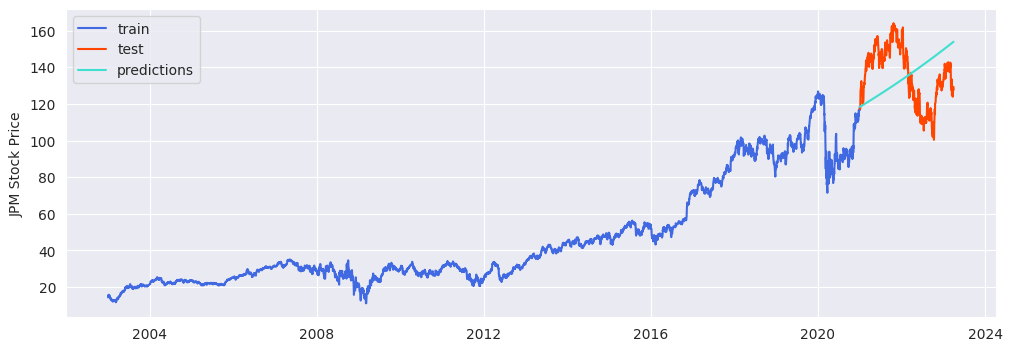

In [ ]:
# plot RW precdictions

plt.figure(figsize=(12, 4))
sns.lineplot(x=train.index, y=df_jpm.loc[train.index, 'jpm_price'], color='royalblue', label='train')
sns.lineplot(x=test.index, y=df_jpm.loc[test.index, 'jpm_price'], color='orangered', label='test')
sns.lineplot(x=test.index, y=RW_pred_mean[test.index], color = 'turquoise', label = 'predictions')
plt.xlabel(None)
plt.ylabel('JPM Stock Price')
plt.show()

In [ ]:
RW_train_mape = mean_absolute_percentage_error(train[1:], RW_pred_mean[train.index[1:]])
RW_test_mape = mean_absolute_percentage_error(test, RW_pred_mean[test.index])

print(f"Random Walk Train MAPE: {round(RW_train_mape, 2)}%")
print(f"Random Walk Test MAPE: {round(RW_test_mape, 2)}%")

Random Walk Train MAPE: 1.36%
Random Walk Test MAPE: 15.53%


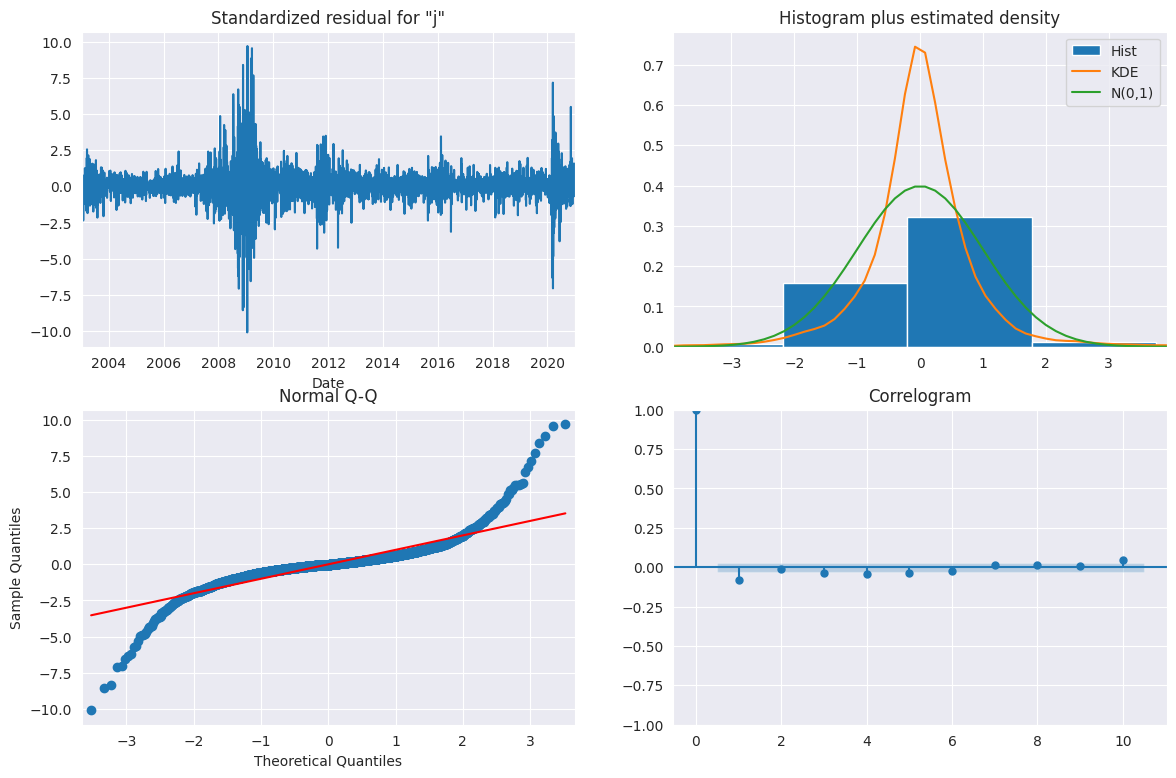

In [ ]:
# model diagnostics
RW_model_fit.plot_diagnostics(figsize=(14, 9))
plt.show()

It shows RW model the MAPE is significantly redcued, however is not perfect and residuals are not normally distributed, model can be further optimised.

## ARIMA model

Based on previous ACF and PACF plots, chose p of 1 from PACF, d of 1 as first-order differencing, q of 1 from ACF plot.

In [ ]:
#fitting model
AR_model = SARIMAX(train_log, order=(1, 1, 0), trend = 'c')
AR_model_fit = AR_model.fit(disp=0)

AR_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              jpm_price   No. Observations:                 4696
Model:               SARIMAX(1, 1, 0)   Log Likelihood               11056.478
Date:                Tue, 02 May 2023   AIC                         -22106.957
Time:                        22:35:30   BIC                         -22087.594
Sample:                    01-02-2003   HQIC                        -22100.149
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      1.431      0.152      -0.000       0.001
ar.L1         -0.0839      0.006    -14.351      0.000      -0.095      -0.072
sigma2         0.0005   3.41e-06    154.452      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             66161.62
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# get predictions
AR_predictions = AR_model_fit.get_prediction(start=1, end=len(train)+len(test)-1)

# create predictions dataframe
AR_pred_df = AR_predictions.conf_int(alpha=0.05)
AR_pred_df['mean'] = AR_predictions.predicted_mean
AR_pred_df['lower 20'] = AR_predictions.conf_int(alpha=0.2).iloc[:,0]
AR_pred_df['upper 20'] = AR_predictions.conf_int(alpha=0.2).iloc[:,1]

AR_pred_df.info()

display(AR_pred_df)

# convert price back to exponential data
AR_pred_mean = AR_pred_df['mean'].transform(np.exp)
AR_pred_mean

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5281 entries, 2003-01-03 to 2023-03-31
Freq: B
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lower jpm_price  5281 non-null   float64
 1   upper jpm_price  5281 non-null   float64
 2   mean             5281 non-null   float64
 3   lower 20         5281 non-null   float64
 4   upper 20         5281 non-null   float64
dtypes: float64(5)
memory usage: 247.5 KB


,lower jpm_price,upper jpm_price,mean,lower 20,upper 20
2003-01-03,2.622183,2.712512,2.667348,2.637816,2.696879
2003-01-06,2.640211,2.730222,2.685217,2.655789,2.714644
2003-01-07,2.711199,2.801210,2.756204,2.726777,2.785632
2003-01-08,2.712952,2.802963,2.757957,2.728530,2.787385
2003-01-09,2.676625,2.766636,2.721630,2.692203,2.751058
...,...,...,...,...,...
2023-03-27,4.029585,6.033351,5.031468,4.376372,5.686564
2023-03-28,4.029169,6.034656,5.031913,4.376254,5.687571
2023-03-29,4.028755,6.035960,5.032357,4.376137,5.688578
2023-03-30,4.028341,6.037263,5.032802,4.376020,5.689584


2003-01-03     14.401723
2003-01-06     14.661377
2003-01-07     15.739983
2003-01-08     15.767597
2003-01-09     15.205092
                 ...    
2023-03-27    153.157660
2023-03-28    153.225780
2023-03-29    153.293930
2023-03-30    153.362110
2023-03-31    153.430321
Freq: B, Name: mean, Length: 5281, dtype: float64

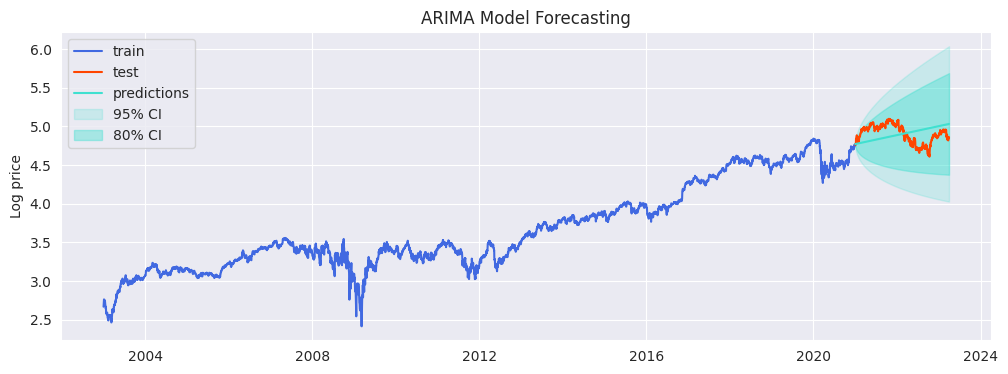

In [ ]:
# plot ARIMA precdictions in log price

plt.figure(figsize=(12, 4))
sns.lineplot(x=train_log.index, y=train_log, color='royalblue', label='train')
sns.lineplot(x=test_log.index, y=test_log, color='orangered', label='test')
sns.lineplot(x=test_log.index, y=AR_pred_df.loc[test_log.index, 'mean'], color = 'turquoise', label = 'predictions')
plt.fill_between(test_log.index, AR_pred_df.loc[test_log.index, 'lower jpm_price'], AR_pred_df.loc[test_log.index, 'upper jpm_price'], color = 'turquoise', alpha = 0.2, label = '95% CI')
plt.fill_between(test_log.index, AR_pred_df.loc[test_log.index, 'lower 20'], AR_pred_df.loc[test_log.index, 'upper 20'], color = 'turquoise', alpha = 0.4, label = '80% CI')
plt.title('ARIMA Model Forecasting')
plt.legend(loc = 'upper left')
plt.ylabel('Log price')
plt.xlabel(None)
plt.show()

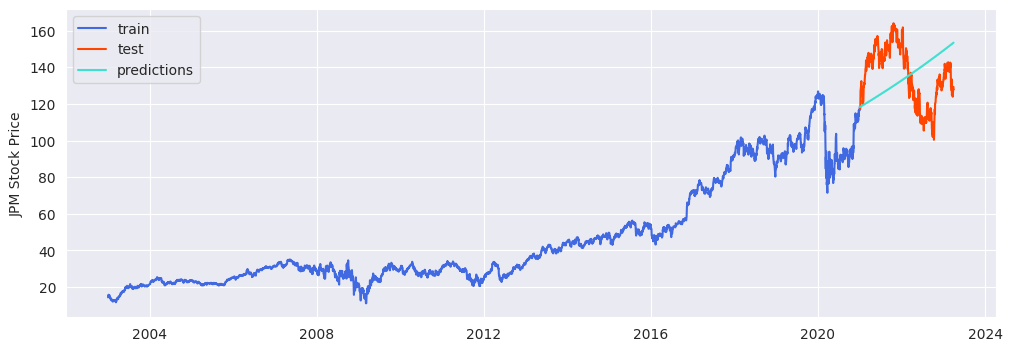

In [ ]:
# plot ARIMA precdictions

plt.figure(figsize=(12, 4))
sns.lineplot(x=train.index, y=train, color='royalblue', label='train')
sns.lineplot(x=test.index, y=test, color='orangered', label='test')
sns.lineplot(x=test.index, y=AR_pred_mean[test.index], color = 'turquoise', label = 'predictions')
plt.xlabel(None)
plt.ylabel('JPM Stock Price')
plt.show()

In [ ]:
# calculate MAPE

AR_train_mape = mean_absolute_percentage_error(train[1:], AR_pred_mean[train.index[1:]])
AR_test_mape = mean_absolute_percentage_error(test, AR_pred_mean[test.index])

print(f"Random Walk Train MAPE: {round(AR_train_mape, 2)}%")
print(f"Random Walk Test MAPE: {round(AR_test_mape, 2)}%")

Random Walk Train MAPE: 1.36%
Random Walk Test MAPE: 15.44%


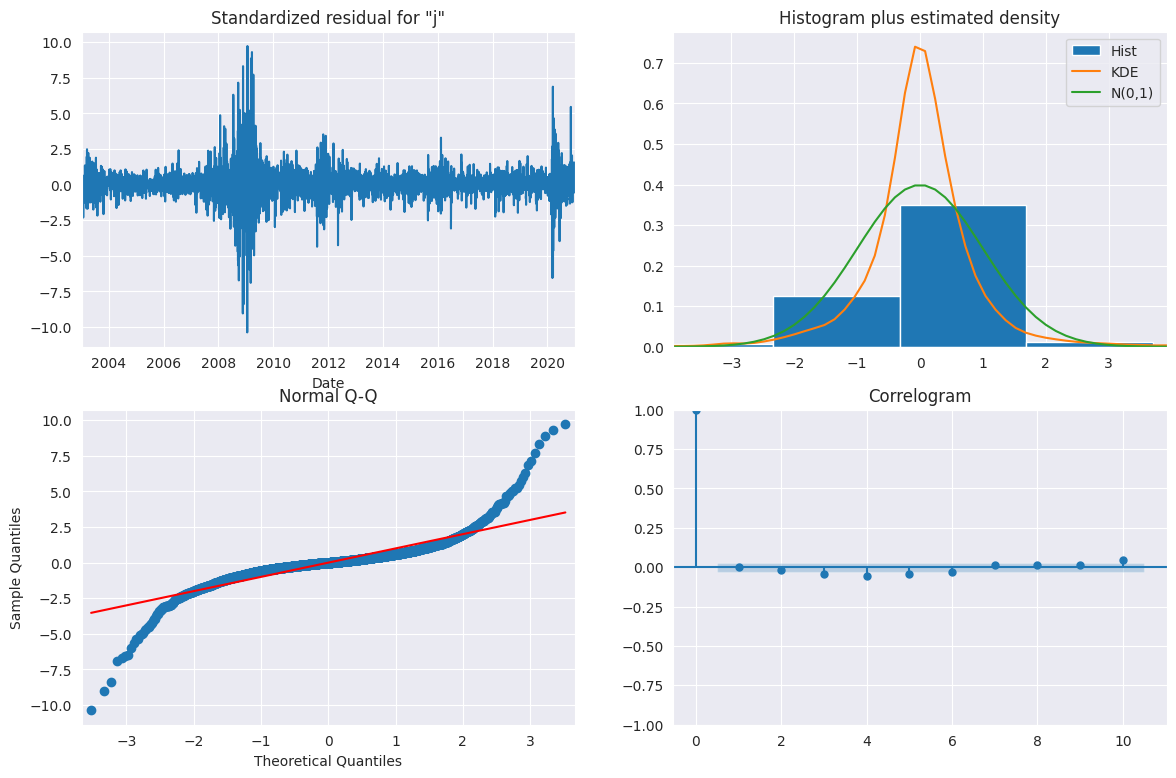

In [ ]:
# model diagnostics
AR_model_fit.plot_diagnostics(figsize=(14, 9))
plt.show()

ARIMA model's MAPE is similar compared to Random Walk model, residuals are still not normally distributed and homoscedastic. Additional transformation and differencing will be needed to further stationarize the data. However, model capture the overall trend in the long term.

Also, the significant impact during 2008 financial crisis and 2020 COVID which causes large variance in the dataset should be considered and adjusted.

Further improvement TBC...